## Case Study on Regression

### We have a dataset of car_age_price that contains information about the price of second-hand Hyundai Grandi10 cars based on their year of making.The objective is to find the best linear relationship between the year and price, and predict the possible price of a 2022 model second-hand Grand i10. 

In [254]:
# importing all essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings



In [255]:
# loading the dataset from local folder
data=pd.read_csv(r"C:\Users\Amby\Downloads\car_age_price.csv")

### Checking the basic details about dataset

In [256]:
data.head()  # displays all columns and first five rows

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [257]:
data.shape #displays total no: of rows and columns in the dataset

(112, 2)

In [258]:
data.info() #displays brief information, like columns,non-null counts, data types etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


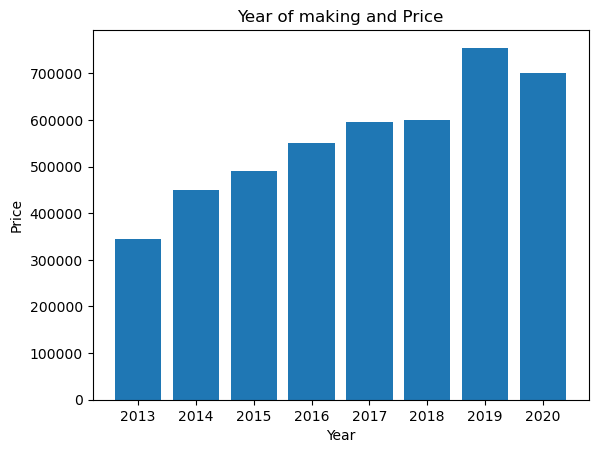

In [259]:
plt.bar(data['Year'],data['Price']) #plotting a barchart with x-axis as year and y-axis as Price 
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year of making and Price')
plt.show()

In [260]:
data.Year.value_counts() 

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

### Missing value Handling

In [261]:
data.isna().sum() #checking for missing values  

Year     0
Price    0
dtype: int64

#### *There is no missing values in the dataset.

### Outlier Handling

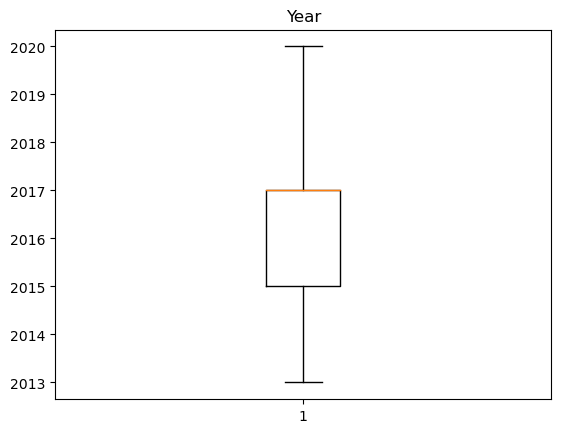

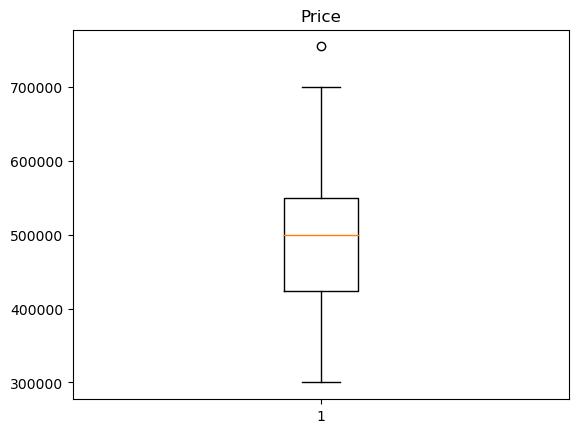

In [262]:
for i in data[['Year','Price']]: # plotting boxplots for year and Price to check for outliers
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [263]:
print(np.where(data['Price']>700000)) #checking the index of the outlier 

(array([1], dtype=int64),)


#### *From the above boxplots, we can see that there is an outlier in the 'Price ' feature. Since, it may harm the dataset if we remove the outlier, we can perform mapping or winsorization to handle the outlier. This will retain the information from the outlier but reduce its influence on the overall analysis. 


In [264]:
# calculating lower and upper threshold for mapping
lower_th=np.percentile(data,1)
upper_th=np.percentile(data,99.5)


In [265]:
# Applying winsorization to map outliers
data_mapped=np.where(data<lower_th,lower_th,data)
data_mapped=np.where(data>upper_th,upper_th,data)

#### * The data_mapped variable now contains the dataset with outliers mapped to the specified thresholds.

In [266]:
# calculating the summary statistics of the mapped data
mapped_stats={
    'min':np.min(data_mapped),'max':np.max(data_mapped),'mean':np.mean(data_mapped)
}
print(mapped_stats)

{'min': 2013.0, 'max': 700000.0, 'mean': 242695.82142857142}


#### * Since,the output of mapping is an array, we need to convert it into a Dataframe to further use the mapped dataset.

In [267]:
# Converting data_mapped array to a DataFrame
map_data=pd.DataFrame(data_mapped,columns=['Year','Price'])
map_data.head()

,Year,Price
0,2018.0,465000.0
1,2019.0,700000.0
2,2019.0,700000.0
3,2018.0,465000.0
4,2018.0,465000.0


#### * Here, our new dataframe is ready for further preprocessing techniques. First we need to find the correlation between the variables('Year' and 'Price') in the dataset. Also we are plotting a heatmap for the visual representation of the correlation matrix.

<Axes: >

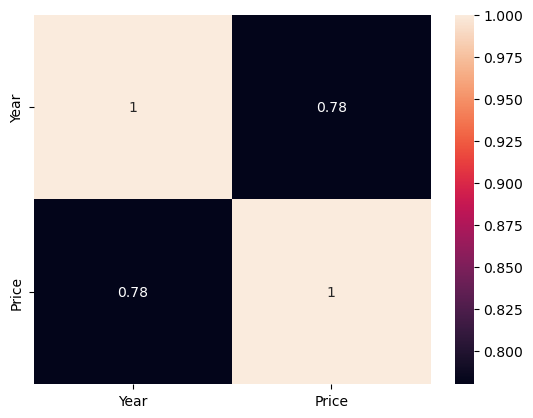

In [269]:
corr_car=map_data.corr()
sns.heatmap(corr_car,annot=True)

#### * As we can see from the above heatmap that the correlation value between the variables is 0.78, it suggests a relatively strong positive relationship between the 'Price' and 'Year' variables. 

### Model Preparation

In [270]:
# Splitting the data into x(independent variable) and y(dependent variable)

y=map_data['Price']# target or dependent variable
x=map_data.drop(['Price'],axis=1) # predictor variable or independent variable or feature 

In [271]:
# Splitting the data into training and testing tests
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

### Implementing Linear Regression Model

In [272]:
# creating an instance of the Linear Regression class
lr_model=LinearRegression() 

In [273]:
# fitting a linear regression model to the training data. 
lr_model=lr.fit(x_train,y_train) 

#### *This will train the model using the training data

In [274]:
# Evaluating  Linear Regression Model Performance
y_predt=lr_model.predict(x_test) 

In [275]:
lr_mse=mean_squared_error(y_test,y_predt)
lr_r2=r2_score(y_test,y_predt)
print('MSE :',lr_mse,'\n','R2_Score :',lr_r2)

MSE : 1845738178.975788 
 R2_Score : 0.7491750791045346


### Conducting Min-Max Scaling to check whether it makes any change in the performance of the model after scaling

In [276]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)

In [277]:
lr_model=LinearRegression()
lr_model=lr.fit(x_train,y_train)
y_predt=lr_model.predict(x_test)
lr_mse=mean_squared_error(y_test,y_predt)
lr_r2=r2_score(y_test,y_predt)
print('MSE :',lr_mse,'\n','R2_Score :',lr_r2)

MSE : 1845738178.975788 
 R2_Score : 0.7491750791045346


#### * By checking the outputs of the linear regression model before scaling and after scaling, we can see that there is no significant difference in the outputs.

### Implementing Lasso Regression Model

In [278]:
x=map_data.drop(['Price'],axis=1) 

In [279]:
#creating an instance of Lasso Regression class
la_model=Lasso(alpha=0.01)
# fitting a Lasso regression model to the training data
la_model.fit(x_train,y_train) 
# Evaluating Lasso Regression model Performance
y_predt=la_model.predict(x_test)

In [280]:
la_mse=mean_squared_error(y_test,y_predt)
la_r2=r2_score(y_test,y_predt)
print('MSE :',la_mse,'\n','R2_score :',la_r2)

MSE : 1845738085.3404844 
 R2_score : 0.7491750918290195


In [281]:
# Conducting Min-Max Scaling to check whether it makes any change in the performance of the model after scaling
min_max=MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)

In [282]:
la_model=Lasso(alpha=0.01)
la_model.fit(x_train,y_train)
y_predt=la_model.predict(x_test)
la_mse=mean_squared_error(y_test,y_predt)
la_r2=r2_score(y_test,y_predt)
print('MSE :',la_mse,'\n','R2_score :',la_r2)


MSE : 1845738085.3404844 
 R2_score : 0.7491750918290195


#### * By checking the outputs of the lasso regression model before scaling and after scaling, we can see that there is no significant difference in the outputs.

### Comparing the performance of Linear Regression Model and Lasso Regression Model 

In [283]:
print(" Linear Regression Model Performance",'\n')
print('  MSE :',lr_mse,'\n',' R2_Score :',lr_r2,'\n')
print(" Lasso Regression Model Performance",'\n')
print(' MSE :',la_mse,'\n','R2_score :',la_r2)

 Linear Regression Model Performance 

  MSE : 1845738178.975788 
  R2_Score : 0.7491750791045346 

 Lasso Regression Model Performance 

 MSE : 1845738085.3404844 
 R2_score : 0.7491750918290195


#### *Based on the performance metrics and analysis, we can see that there is only a minute difference in the MSE and R2_score values for both the regression models. However, taking that minute difference into account, lasso regression model is better suited for predicting the price in this case.  

### Price Prediction for 2022 Model

In [284]:
# Predicting the price of a 2022 model using linear regression model
lr_pred_2022=lr_model.predict([[2022]])
print(lr_pred_2022)

[716918.15340908]


In [285]:
# Predicting the price of a 2022 model using lasso regression model
la_pred_2022=la_model.predict([[2022]])
print(la_pred_2022)

[716918.13133521]


In [286]:
print("Predicted Price of a 2022 Model Second-hand Hyundai Grand i10 ",'\n')
print("Linear Regression :", lr_pred_2022)
print("Lasso Regression  :",la_pred_2022)

Predicted Price of a 2022 Model Second-hand Hyundai Grand i10  

Linear Regression : [716918.15340908]
Lasso Regression  : [716918.13133521]


#### * As we can see from the above findings, there is only a minute difference in the predicted price values for both the models of  2022 model second-hand Hyundai Grand i10. However, by taking the overall performance of both the models in to account, lasso regression is better in performance in this case. Ultimately, the choice between linear regression and lasso regression depends on the specific characteristics of the data you are taking and the goals of the analysis. 